# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics         import plot_confusion_matrix
from sklearn.metrics         import ConfusionMatrixDisplay
from sklearn.metrics         import confusion_matrix

%matplotlib inline

In [3]:
_X_train = pd.read_csv(
    filepath_or_buffer='output/X_train.csv', 
    index_col=['Unnamed: 0', 'subject_train'])
_X_train

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [4]:
y_train = (pd.read_csv(
    filepath_or_buffer='download/UCI HAR Dataset/train/y_train.txt', 
    header=None).squeeze('columns'))
y_train

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: 0, Length: 7352, dtype: int64

In [5]:
_X_test = pd.read_csv(
    filepath_or_buffer='output/X_test.csv', 
    index_col=['Unnamed: 0', 'subject_test'])
_X_test

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [6]:
y_test = (pd.read_csv(
    filepath_or_buffer='download/UCI HAR Dataset/test/y_test.txt', 
    header=None).squeeze('columns'))
y_test

0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: 0, Length: 2947, dtype: int64

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamos acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [7]:
cols = ['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '42 tGravityAcc-mean()-Y']

X_train = _X_train[cols]
X_test  = _X_test [cols]

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

clf = DecisionTreeClassifier(min_samples_leaf=20, 
                             random_state=42)
path = clf.cost_complexity_pruning_path(X=X_train, 
                                        y=y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

print('Quantidade de ccp_alphas:', ccp_alphas.size)

X_train: (7352, 3)
y_train: (7352,)
X_test: (2947, 3)
y_test: (2947,)
Quantidade de ccp_alphas: 108


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [8]:
%%time

clf = DecisionTreeClassifier(random_state=42)

grid_parametros = {'ccp_alpha': ccp_alphas[::10]}

grid = GridSearchCV(estimator=clf, 
                    param_grid=grid_parametros, 
                    cv=10, 
                    verbose=1)
grid.fit(X_train, y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.sort_values(by='rank_test_score')

Fitting 10 folds for each of 11 candidates, totalling 110 fits
CPU times: user 2.6 s, sys: 28.7 ms, total: 2.63 s
Wall time: 2.71 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
10,0.020534,0.001076,0.002032,0.000350,0.007083,{'ccp_alpha': 0.007082924052720332},0.792120,0.808424,0.873469,0.771429,0.798639,0.790476,0.838095,0.779592,0.863946,0.722449,0.803864,0.042733,1
9,0.021609,0.000905,0.001736,0.000154,0.002034,{'ccp_alpha': 0.0020342316461378998},0.802989,0.736413,0.850340,0.765986,0.742857,0.783673,0.831293,0.737415,0.831293,0.737415,0.781967,0.042209,2
8,0.021350,0.001605,0.002005,0.000413,0.00112,{'ccp_alpha': 0.001120493079864795},0.764946,0.711957,0.838095,0.764626,0.748299,0.768707,0.814966,0.715646,0.838095,0.791837,0.775717,0.042774,3
5,0.020658,0.001288,0.001740,0.000196,0.000317,{'ccp_alpha': 0.000316912071380578},0.730978,0.736413,0.814966,0.714286,0.761905,0.749660,0.783673,0.795918,0.832653,0.790476,0.771093,0.036671,4
4,0.021694,0.003403,0.002442,0.001491,0.000206,{'ccp_alpha': 0.00020584175583017689},0.774457,0.743207,0.824490,0.700680,0.746939,0.730612,0.775510,0.791837,0.819048,0.789116,0.769589,0.037245,5
6,0.020622,0.001203,0.001964,0.000452,0.000432,{'ccp_alpha': 0.0004324280328325261},0.737772,0.724185,0.802721,0.715646,0.764626,0.748299,0.772789,0.793197,0.844898,0.783673,0.768781,0.037403,6
0,0.022922,0.001836,0.002409,0.000858,0.0,{'ccp_alpha': 0.0},0.775815,0.729620,0.843537,0.689796,0.741497,0.721088,0.760544,0.800000,0.806803,0.772789,0.764149,0.043265,7
1,0.022353,0.001828,0.002098,0.000452,0.00002,{'ccp_alpha': 2.040261153427622e-05},0.775815,0.729620,0.843537,0.689796,0.741497,0.721088,0.760544,0.800000,0.806803,0.772789,0.764149,0.043265,7
2,0.022330,0.002507,0.002403,0.000459,0.000059,{'ccp_alpha': 5.918425528606344e-05},0.775815,0.729620,0.843537,0.689796,0.741497,0.721088,0.760544,0.800000,0.806803,0.772789,0.764149,0.043265,7
3,0.024455,0.002815,0.003253,0.002623,0.000097,{'ccp_alpha': 9.743287957185074e-05},0.775815,0.729620,0.843537,0.689796,0.741497,0.721088,0.760544,0.800000,0.806803,0.772789,0.764149,0.043265,7


In [9]:
# melhor_ccp = resultados.iloc[grid.best_index_, 4]
melhor_ccp = resultados.iloc[grid.best_index_]['param_ccp_alpha']

print('\n rank_test_score vencedor:')
print('\t mean_test_score:', grid.best_score_)
print('\t param_ccp_alpha:', melhor_ccp)


 rank_test_score vencedor:
	 mean_test_score: 0.8038638716356108
	 param_ccp_alpha: 0.007082924052720332


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Parâmetro                    Valor
ccp_alpha                 0.007083
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.7207329487614523


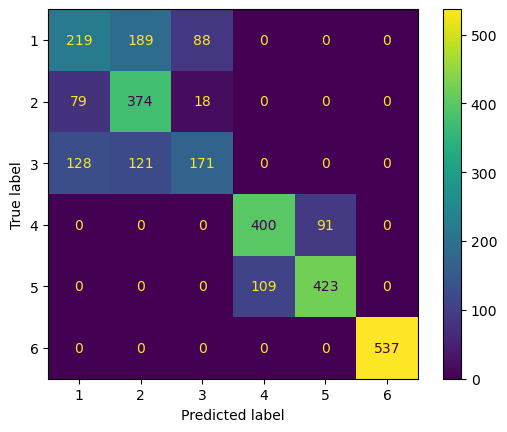

CPU times: user 429 ms, sys: 72.3 ms, total: 501 ms
Wall time: 386 ms


In [10]:
%%time

clf = DecisionTreeClassifier(random_state=42, 
                             ccp_alpha=melhor_ccp
                            ).fit(X_train, y_train)
print(pd.DataFrame(data=clf.get_params(), 
                   index=pd.Index(data=['Valor'], 
                                  name='Parâmetro')
                  ).T, 
      '\n')

print('Acurácia da árvore na base de testes:', 
      clf.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_test, 
                                      y=y_test)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Faça uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [11]:
%%time

matriz = confusion_matrix(y_true=y_test, 
                          y_pred=clf.predict(X_test))

acertos = [matriz[x,x] for x in range(6)]
erros   = sum(matriz) - acertos

pd.DataFrame(data={'acertos':acertos, 
                   'erros':erros}, 
             index=pd.Index(data=list(range(1,7)), 
                            name='classe')
            ).sort_values(by='erros', 
                          ascending=False)

CPU times: user 7.72 ms, sys: 2.18 ms, total: 9.9 ms
Wall time: 8.78 ms


,acertos,erros
classe,,
2,374,310
1,219,207
4,400,109
3,171,106
5,423,91
6,537,0


In [12]:
print(y_train.value_counts().sort_index())

y_train_2 = pd.Series(data=(y_train == 2), 
                      name='classe_2')
y_train_2.value_counts()

1    1226
2    1073
3     986
4    1286
5    1374
6    1407
Name: 0, dtype: int64


False    6279
True     1073
Name: classe_2, dtype: int64

In [13]:
%%time

clf_2 = DecisionTreeClassifier(min_samples_leaf=20, 
                               max_depth=4, 
                               random_state=42).fit(X=_X_train, 
                                                    y=y_train_2)

melhores_classe2 = (pd.DataFrame(data={'var': _X_train.columns, 
                                       'feature_importances_': clf_2.feature_importances_})
                      .sort_values(by='feature_importances_', 
                                   ascending=False))
cols_classe2 = melhores_classe2['var'].values[:3]
print('3 melhores variáveis:', cols_classe2, '\n')

cols_2 = cols + cols_classe2.tolist()
X_train = _X_train[cols_2]
X_test = _X_test[cols_2]
print('X_train: \n', X_train.columns)
print('X_test: \n', X_test.columns)

3 melhores variáveis: ['74 tGravityAcc-arCoeff()-Z,1' '331 fBodyAcc-bandsEnergy()-1,8'
 '427 fBodyGyro-std()-X'] 

X_train: 
 Index(['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16',
       '42 tGravityAcc-mean()-Y', '74 tGravityAcc-arCoeff()-Z,1',
       '331 fBodyAcc-bandsEnergy()-1,8', '427 fBodyGyro-std()-X'],
      dtype='object')
X_test: 
 Index(['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16',
       '42 tGravityAcc-mean()-Y', '74 tGravityAcc-arCoeff()-Z,1',
       '331 fBodyAcc-bandsEnergy()-1,8', '427 fBodyGyro-std()-X'],
      dtype='object')
CPU times: user 1.71 s, sys: 53.9 ms, total: 1.76 s
Wall time: 1.81 s


In [14]:
%%time

clf_2 = DecisionTreeClassifier(random_state=42)
path_2 = clf_2.cost_complexity_pruning_path(X=X_train, 
                                            y=y_train)
ccp_alphas_2, impurities_2 = path_2.ccp_alphas, path_2.impurities
ccp_alphas_2 = np.unique(ccp_alphas_2[ccp_alphas_2 >= 0])

clf_2 = DecisionTreeClassifier(random_state=42)
grid_2 = GridSearchCV(estimator=clf_2, 
                      param_grid={'ccp_alpha': ccp_alphas_2[::10]}, 
                      cv=10, 
                      verbose=1)
grid_2.fit(X_train, y_train)

resultados_2 = pd.DataFrame(grid_2.cv_results_)
resultados_2.sort_values(by='rank_test_score')

Fitting 10 folds for each of 22 candidates, totalling 220 fits
CPU times: user 9.58 s, sys: 69.8 ms, total: 9.65 s
Wall time: 9.8 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
21,0.041487,0.003613,0.001784,0.000287,0.011176,{'ccp_alpha': 0.01117623543057511},0.823370,0.794837,0.915646,0.808163,0.869388,0.851701,0.850340,0.887075,0.908844,0.823129,0.853249,0.039553,1
20,0.040843,0.003065,0.001974,0.000351,0.002659,{'ccp_alpha': 0.002659233269442159},0.866848,0.805707,0.896599,0.763265,0.820408,0.812245,0.854422,0.895238,0.918367,0.839456,0.847255,0.045845,2
19,0.040107,0.002667,0.001918,0.000348,0.001469,{'ccp_alpha': 0.0014685366906451204},0.862772,0.771739,0.884354,0.783673,0.824490,0.801361,0.887075,0.874830,0.897959,0.842177,0.843043,0.043304,3
18,0.039492,0.002203,0.001720,0.000145,0.001077,{'ccp_alpha': 0.001076804497642365},0.868207,0.782609,0.872109,0.772789,0.831293,0.778231,0.872109,0.851701,0.910204,0.842177,0.838143,0.044267,4
14,0.040897,0.002904,0.002102,0.000455,0.000515,{'ccp_alpha': 0.0005147154562279699},0.820652,0.744565,0.836735,0.776871,0.839456,0.790476,0.868027,0.850340,0.899320,0.851701,0.827814,0.043582,5
13,0.042947,0.002050,0.002138,0.000410,0.000444,{'ccp_alpha': 0.00044396559952656386},0.838315,0.729620,0.836735,0.774150,0.836735,0.793197,0.872109,0.847619,0.892517,0.857143,0.827814,0.046250,6
12,0.046373,0.007654,0.001953,0.000289,0.000413,{'ccp_alpha': 0.000412963970499335},0.838315,0.729620,0.838095,0.772789,0.832653,0.795918,0.876190,0.842177,0.889796,0.857143,0.827270,0.046013,7
15,0.040503,0.001636,0.001933,0.000265,0.000571,{'ccp_alpha': 0.0005712731229597389},0.817935,0.743207,0.831293,0.776871,0.839456,0.790476,0.863946,0.847619,0.902041,0.851701,0.826454,0.043763,8
16,0.041351,0.002397,0.002212,0.000418,0.00064,{'ccp_alpha': 0.0006398332500073521},0.816576,0.741848,0.831293,0.776871,0.840816,0.791837,0.863946,0.848980,0.904762,0.840816,0.825774,0.044033,9
11,0.042474,0.002356,0.002087,0.000297,0.000351,{'ccp_alpha': 0.00035137830975698217},0.831522,0.713315,0.839456,0.772789,0.829932,0.791837,0.876190,0.843537,0.893878,0.863946,0.825640,0.050790,10


In [15]:
melhor_ccp_2 = grid_2.best_params_['ccp_alpha']

print('\n rank_test_score vencedor:')
print('\t mean_test_score:', grid_2.best_score_)
print('\t param_ccp_alpha:', melhor_ccp_2)


 rank_test_score vencedor:
	 mean_test_score: 0.8532492236024846
	 param_ccp_alpha: 0.01117623543057511


Parâmetro                    Valor
ccp_alpha                 0.011176
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.7577197149643705


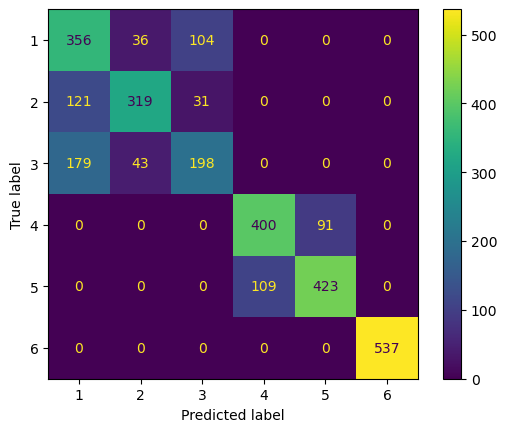

CPU times: user 413 ms, sys: 60.1 ms, total: 473 ms
Wall time: 365 ms


In [16]:
%%time

clf_2 = DecisionTreeClassifier(random_state=42, 
                               ccp_alpha=melhor_ccp_2
                              ).fit(X_train, y_train)
print(pd.DataFrame(data=clf_2.get_params(), 
                   index=pd.Index(data=['Valor'], 
                                  name='Parâmetro')
                  ).T, 
      '\n')

print('Acurácia da árvore na base de testes:', 
      clf_2.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf_2, 
                                      X=X_test, 
                                      y=y_test)
plt.show()